In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import pylab
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from pathlib import Path
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
import math
sns.set()

In [143]:
file_path = Path('data/BitCoin/gemini_BTCUSD_2020_1min.csv')
file_path

WindowsPath('data/BitCoin/gemini_BTCUSD_2020_1min.csv')

In [145]:
df = pd.read_csv(file_path, sep = ',')
df.head()

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
0,1.618880e+12,4/20/2021 0:02,BTCUSD,55717.47,55723.00,55541.69,55541.69,2.406734
1,1.618880e+12,4/20/2021 0:01,BTCUSD,55768.94,55849.82,55711.74,55717.47,0.573458
2,1.618880e+12,4/20/2021 0:00,BTCUSD,55691.79,55793.15,55691.79,55768.94,3.309904
3,1.618880e+12,4/19/2021 23:59,BTCUSD,55777.86,55777.86,55677.92,55691.79,0.684934
4,1.618880e+12,4/19/2021 23:58,BTCUSD,55803.50,55823.88,55773.08,55777.86,0.477225


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 658065 entries, 0 to 658064
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unix Timestamp  658065 non-null  float64
 1   Date            658065 non-null  object 
 2   Symbol          658065 non-null  object 
 3   Open            658065 non-null  float64
 4   High            658065 non-null  float64
 5   Low             658065 non-null  float64
 6   Close           658065 non-null  float64
 7   Volume          658065 non-null  float64
dtypes: float64(6), object(2)
memory usage: 40.2+ MB


In [150]:
df.isna().sum()

Unix Timestamp    0
Date              0
Symbol            0
Open              0
High              0
Low               0
Close             0
Volume            0
dtype: int64

In [152]:
del df['Unix Timestamp'], df['Symbol'], df['Volume']

<Axes: >

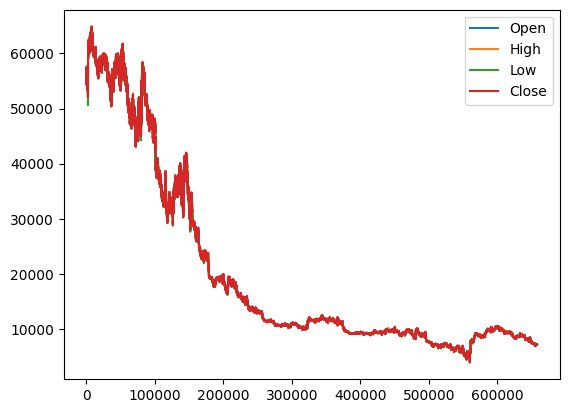

In [154]:
df.plot()

In [156]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

array([[<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

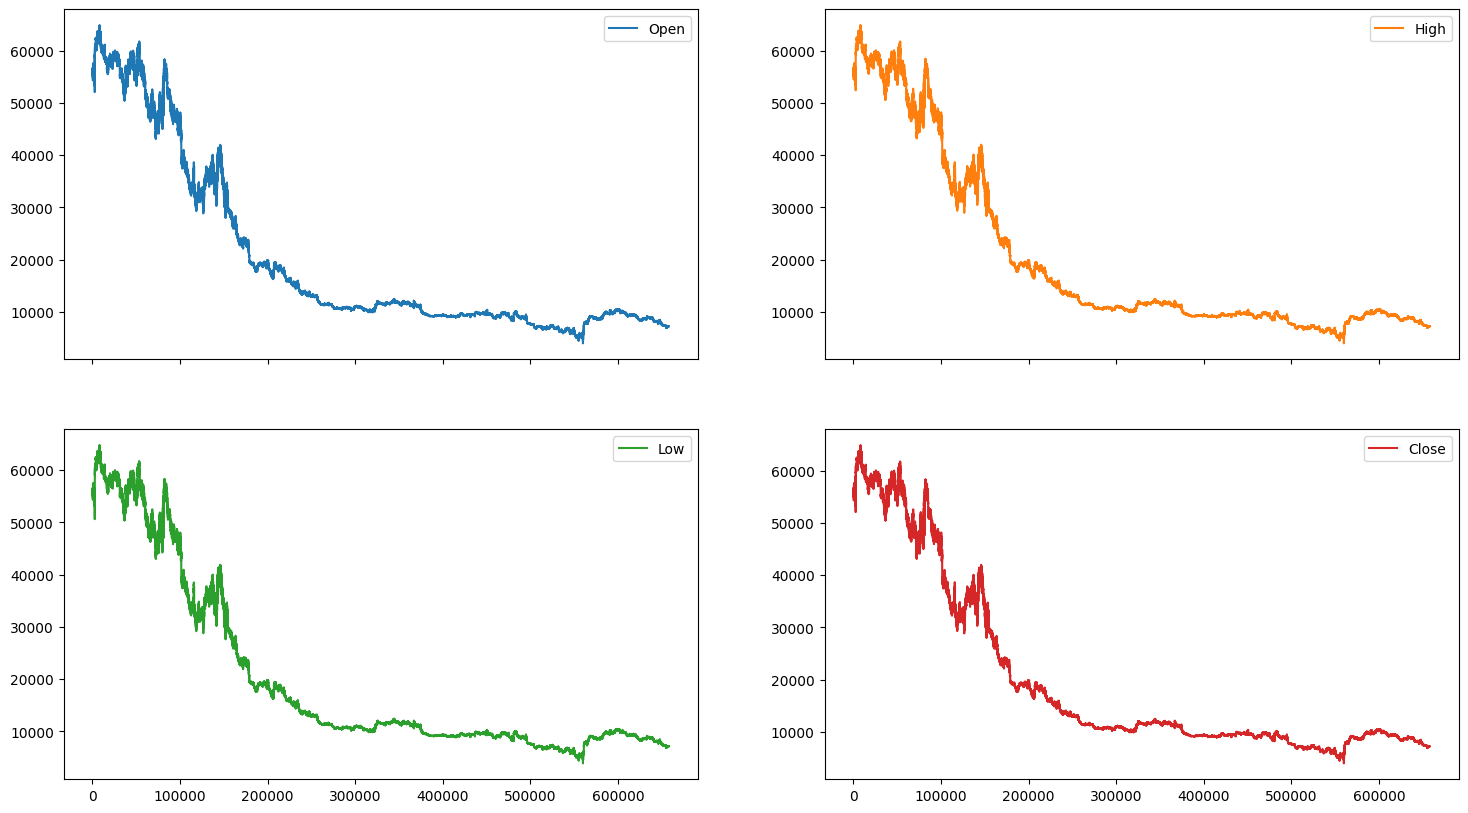

In [158]:
df.plot(subplots=True, layout=(2, 2), figsize=(18, 10))

<Axes: ylabel='Density'>

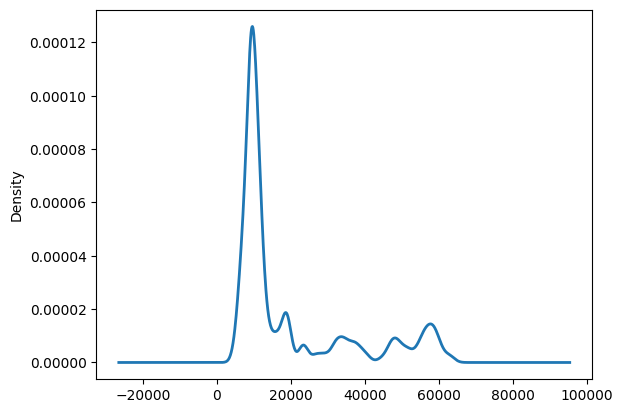

In [176]:
df.Close.plot(kind = 'density', linewidth=2)

<Axes: >

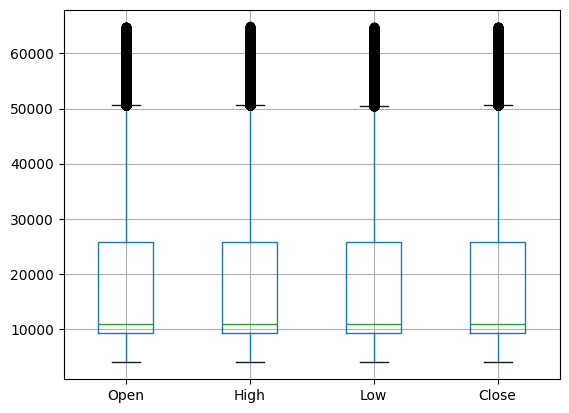

In [174]:
df.boxplot()

In [166]:
df['Date'] = pd.to_datetime(df.Date)

In [170]:
df.set_index('Date', inplace=True)

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 658065 entries, 2021-04-20 00:02:00 to 2020-01-01 00:00:00
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Open    658065 non-null  float64
 1   High    658065 non-null  float64
 2   Low     658065 non-null  float64
 3   Close   658065 non-null  float64
dtypes: float64(4)
memory usage: 25.1 MB


array([[<Axes: xlabel='Date'>, <Axes: xlabel='Date'>],
       [<Axes: xlabel='Date'>, <Axes: xlabel='Date'>]], dtype=object)

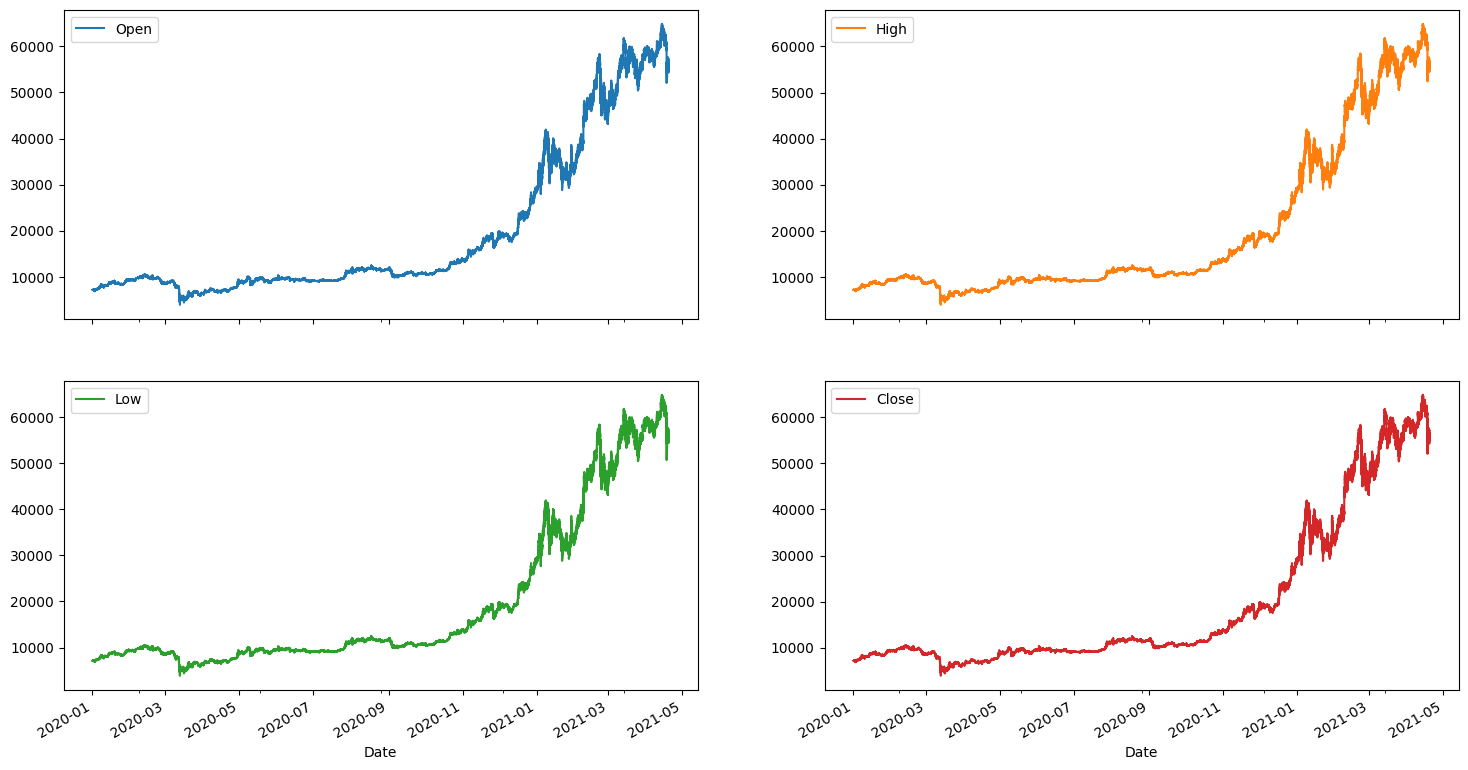

In [178]:
df.plot(subplots=True, layout=(2, 2), figsize=(18, 10))

In [180]:
df = df.resample('W').mean()

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 69 entries, 2020-01-05 to 2021-04-25
Freq: W-SUN
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    69 non-null     float64
 1   High    69 non-null     float64
 2   Low     69 non-null     float64
 3   Close   69 non-null     float64
dtypes: float64(4)
memory usage: 2.7 KB


In [184]:
df.head()

,Open,High,Low,Close
Date,,,,
2020-01-05,7246.751078,7248.986521,7245.618553,7246.776893
2020-01-12,7967.313206,7971.561151,7964.988570,7967.432896
2020-01-19,8668.073389,8672.215057,8665.670985,8668.124854
2020-01-26,8515.359564,8517.924204,8514.109666,8515.378596
2020-02-02,9221.393119,9225.091556,9219.410800,9221.466260


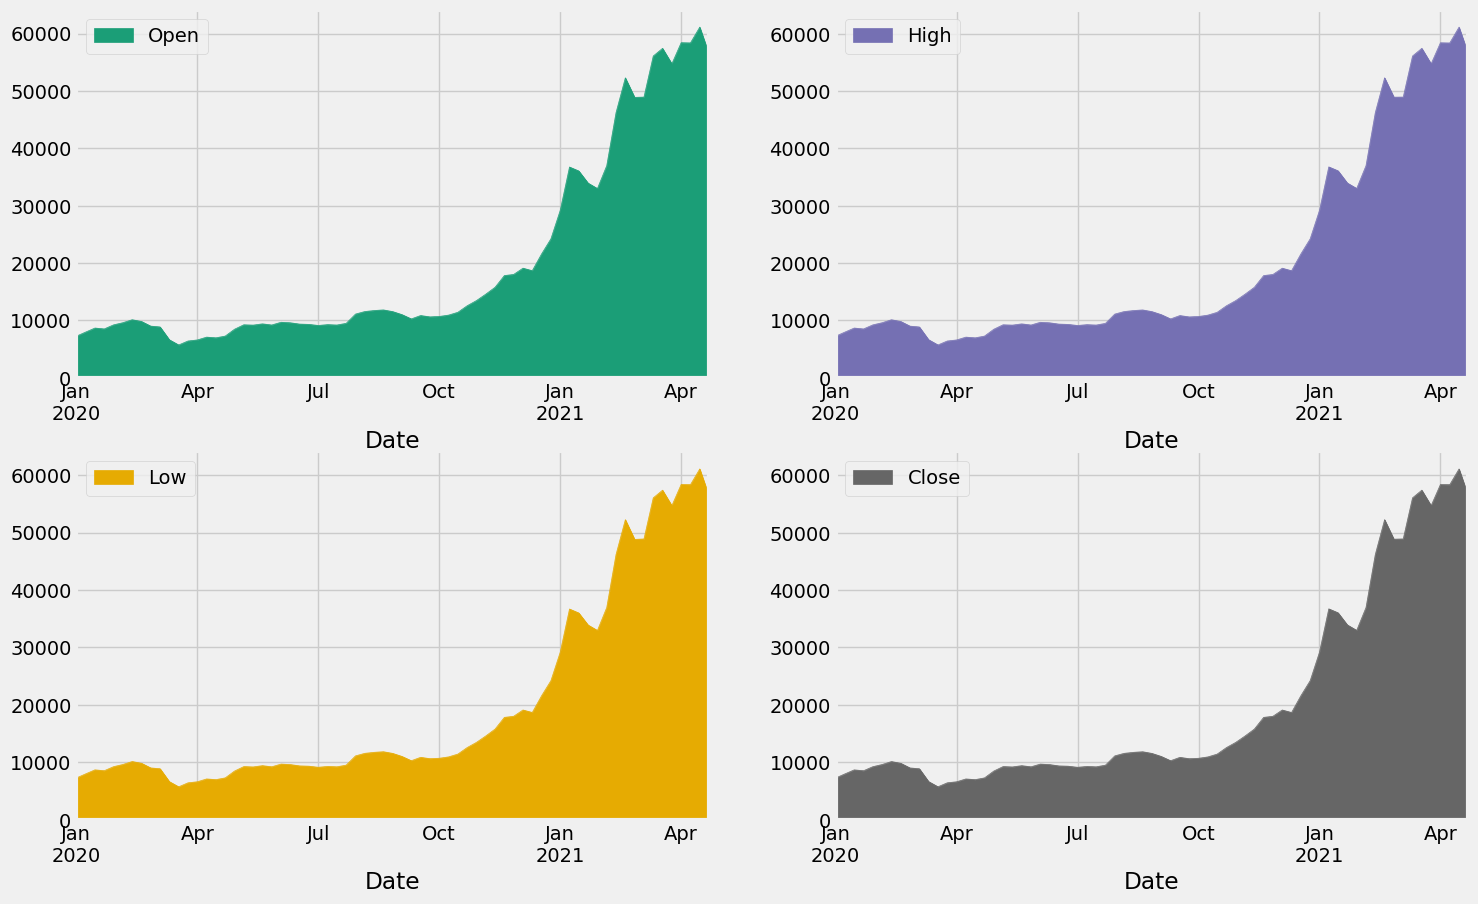

In [200]:
plt.style.use('fivethirtyeight')
df.plot.area(subplots=True,
       colormap = 'Dark2',
       linewidth = 0.5, 
       layout=(2, 2), 
       figsize = (16,  10),
       sharex = False, 
       sharey = False)
plt.show()

<Axes: xlabel='Date'>

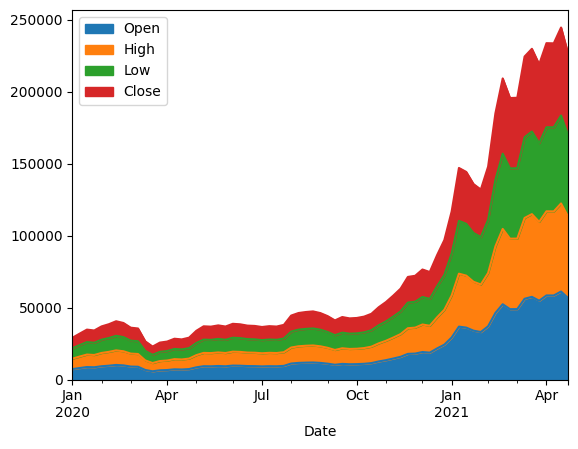

In [202]:
plt.style.use('default')
df.plot.area()

In [204]:
size = int(len(df)*0.8)

In [206]:
df_copy = df.copy()
df_train = df.iloc[:size]
df_test = df.iloc[size:]
df = df_train

In [208]:
df.tail()

,Open,High,Low,Close
Date,,,,
2020-12-20,21585.318269,21597.164050,21572.556037,21585.745201
2020-12-27,24213.836524,24230.733234,24194.279285,24214.105831
2021-01-03,29173.100452,29195.139405,29148.131971,29173.787752
2021-01-10,36736.460898,36784.513706,36681.834021,36736.955182
2021-01-17,36048.843059,36098.732387,35990.883557,36048.623141


In [210]:
df_test.head()

,Open,High,Low,Close
Date,,,,
2021-01-24,33931.800576,33964.141361,33895.259796,33931.443830
2021-01-31,32985.487454,33022.298117,32948.734007,32985.542050
2021-02-07,36966.428327,36994.589781,36938.019330,36966.987533
2021-02-14,46221.873490,46263.102500,46180.550831,46222.851572
2021-02-21,52284.064021,52320.986463,52247.665704,52284.945273


In [214]:
# for prediction purposes
start_date = '2021-01-17'
end_date = '2021-04-25'

### df = df.sort_index()
=> in case if dates are not in order

<Axes: xlabel='Date'>

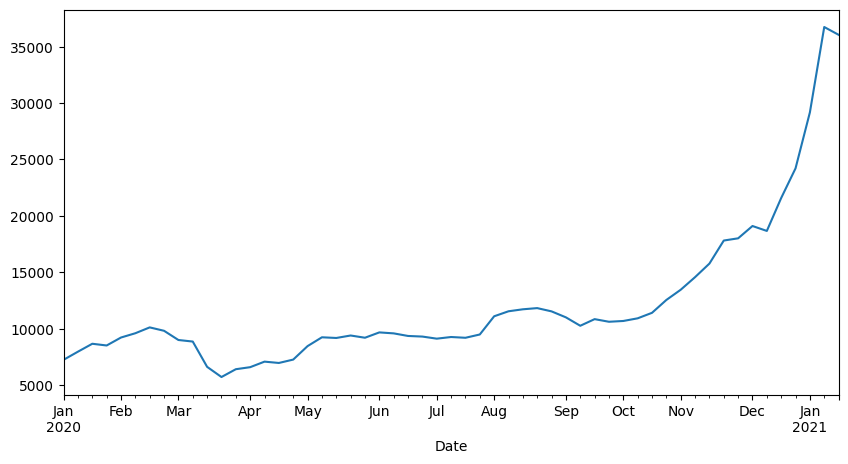

In [221]:
df.Close.plot(figsize=(10, 5))

<Axes: xlabel='Date'>

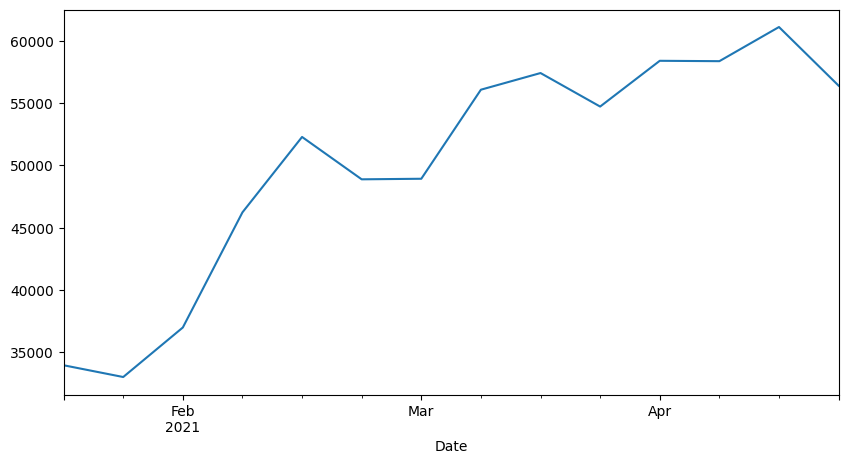

In [223]:
df_test.Close.plot(figsize=(10, 5))

In [225]:
sts.adfuller(df.Close)

(3.212274854094495,
 1.0,
 4,
 50,
 {'1%': -3.568485864, '5%': -2.92135992, '10%': -2.5986616},
 739.9376173008593)

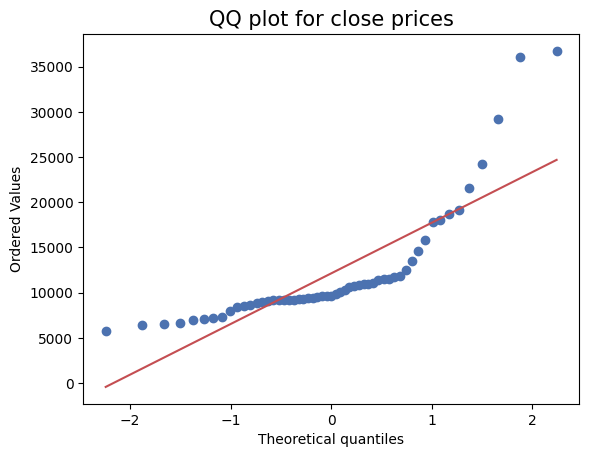

In [229]:
scipy.stats.probplot(df.Close, plot = pylab)
plt.title('QQ plot for close prices', size=15)
plt.show()

In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 55 entries, 2020-01-05 to 2021-01-17
Freq: W-SUN
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    55 non-null     float64
 1   High    55 non-null     float64
 2   Low     55 non-null     float64
 3   Close   55 non-null     float64
dtypes: float64(4)
memory usage: 2.1 KB


In [233]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14 entries, 2021-01-24 to 2021-04-25
Freq: W-SUN
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    14 non-null     float64
 1   High    14 non-null     float64
 2   Low     14 non-null     float64
 3   Close   14 non-null     float64
dtypes: float64(4)
memory usage: 560.0 bytes


In [239]:
import warnings
warnings.filterwarnings('ignore')

<Axes: xlabel='Close', ylabel='Density'>

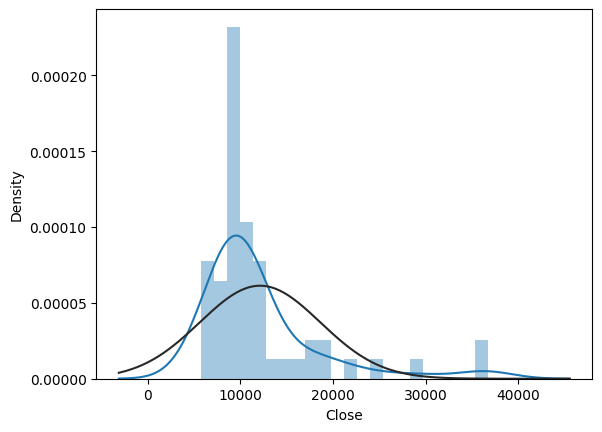

In [241]:
from numpy.random import normal, seed
from scipy.stats import norm
sns.distplot(df.Close, fit=norm, kde=True)

In [249]:
df['Returns'] = df.Close.pct_change(1).mul(100)

In [251]:
sts.adfuller(df.Returns[1:])

(-4.8292598171804855,
 4.779346758181404e-05,
 0,
 53,
 {'1%': -3.560242358792829,
  '5%': -2.9178502070837,
  '10%': -2.5967964150943397},
 282.5410448771065)

In [253]:
df = df.iloc[1:]

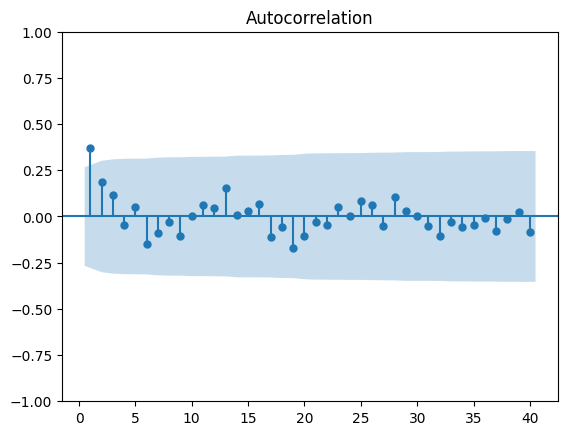

In [259]:
sgt.plot_acf(df.Returns, lags = 40, zero = False)
plt.show()

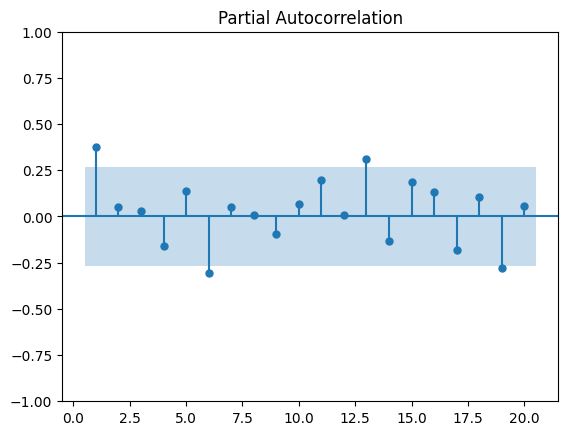

In [277]:
sgt.plot_pacf(df.Returns, zero = False, lags = 20, method = ('ols'))
plt.show()

In [271]:
seasonal_additive = seasonal_decompose(df.Returns, model = 'multiplicative')
seasonal_additive.plot()
plt.show()

ValueError: Multiplicative seasonality is not appropriate for zero and negative values

In [279]:
model_ar1_ma1 = SARIMAX(df.Returns, order=(1, 0, 1))
result_ar1_ma1 = model_ar1_ma1.fit()

In [281]:
resid_ar1_ma1 = result_ar1_ma1.resid

In [283]:
resid_ar1_ma1.var()

60.58035379468211

In [285]:
resid_ar1_ma1.mean()

1.6024208087257803

In [301]:
resid_ar1_ma1.std()

7.783338216644713

In [307]:
mae = np.mean(np.abs(resid_ar1_ma1))
mae # mean absolute error

5.885507468827848

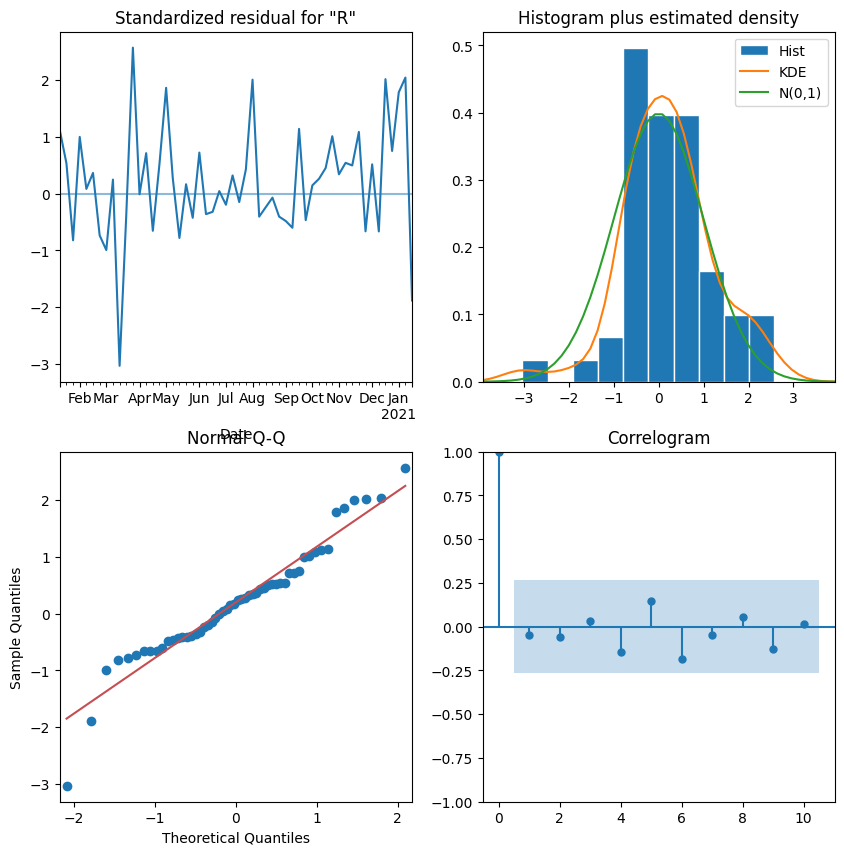

In [309]:
result_ar1_ma1.plot_diagnostics(figsize=(10, 10))
plt.show()

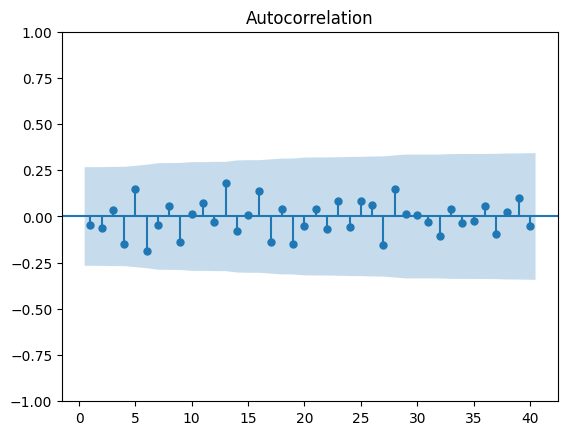

In [321]:
plt.style.use('default')
sgt.plot_acf(resid_ar1_ma1, zero = False, lags = 40)
plt.show()

In [325]:
print(result_ar1_ma1.summary())

                               SARIMAX Results                                
Dep. Variable:                Returns   No. Observations:                   54
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -188.020
Date:                Wed, 05 Mar 2025   AIC                            382.040
Time:                        10:35:50   BIC                            388.007
Sample:                    01-12-2020   HQIC                           384.341
                         - 01-17-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6499      0.272      2.386      0.017       0.116       1.184
ma.L1         -0.2458      0.442     -0.556      0.578      -1.112       0.620
sigma2        61.6399      9.478      6.503      0.0

In [327]:
from statsmodels.tsa.seasonal import seasonal_decompose

Given that weekly data typically has yearly seasonality, the period 𝑁 should reflect the number of weeks in a year. Since there are approximately 52 weeks in a year, you should set 𝑁 = 52.

In [340]:
# Using 13 weeks for quarterly seasonality

In [342]:
decomp_results = seasonal_decompose(df.Returns, period = 13)

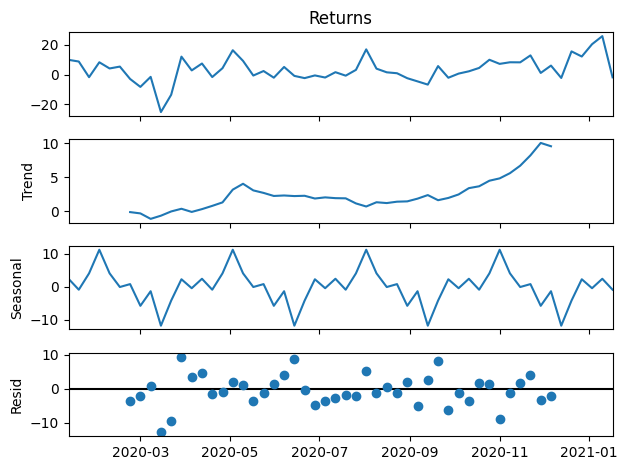

In [344]:
decomp_results.plot()
plt.show()

Returns: The original time series data shows fluctuations between approximately -20 and 20 over the time period from early 2020 to early 2021.

Trend: The trend component indicates a general increase over time, particularly from mid-2020 onwards.

Seasonal: The seasonal component displays a repeating pattern with peaks and troughs approximately every three months, confirming the presence of quarterly seasonality.

Residuals (Resid): The residuals are the remaining fluctuations after removing the trend and seasonal components, scattered around zero.

The quarterly seasonality is evident in the Seasonal plot, with repeating patterns every three months. This information will help you when building your forecasting models, as it indicates a seasonal period of 3 months (or 𝑠 = 3 quarters).

---
Since your data is weekly and you're capturing quarterly seasonality, setting 
𝑠 = 13 is appropriate. This reflects the approximate 13-week period within each quarter.

---

In [353]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Returns'], dtype='object')

In [355]:
# Open, High, Low -> Exog variables

In [357]:
model_ar1_ma1_x = SARIMAX(df.Returns, order=(1, 0, 1), exog=df[['Open', 'High', 'Low']])
result_ar1_ma1_x = model_ar1_ma1.fit()

In [359]:
resid_ar1_ma1_x = result_ar1_ma1_x.resid

In [361]:
mae = np.mean(np.abs(resid_ar1_ma1_x))
mae

5.885507468827848

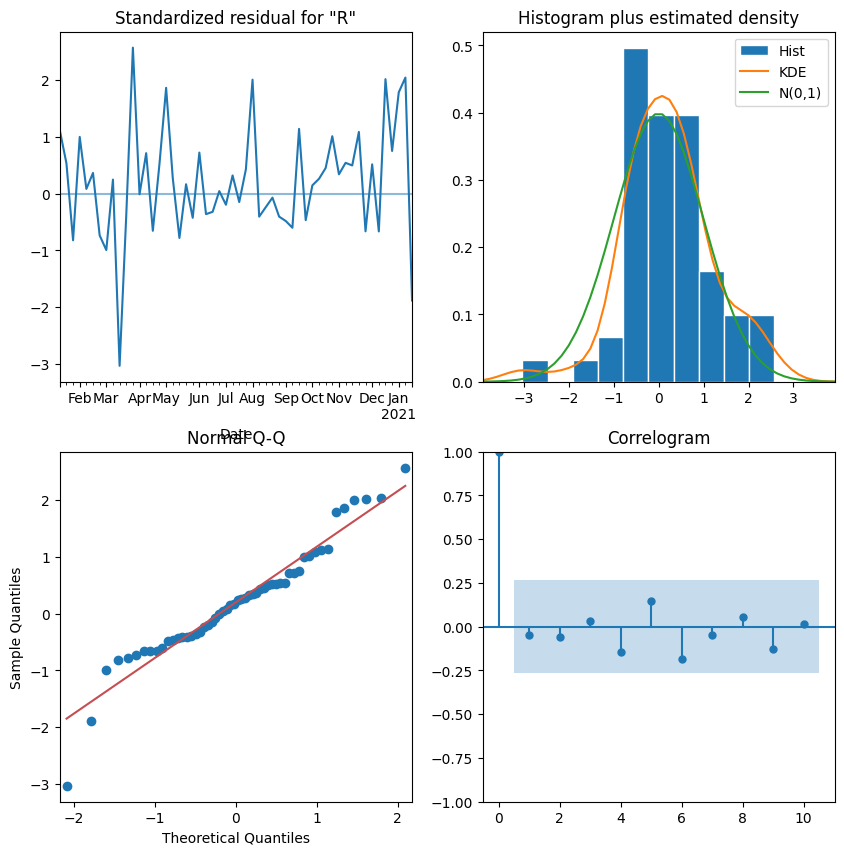

In [369]:
plt.style.use('default')
result_ar1_ma1_x.plot_diagnostics(figsize=(10, 10))
plt.show()

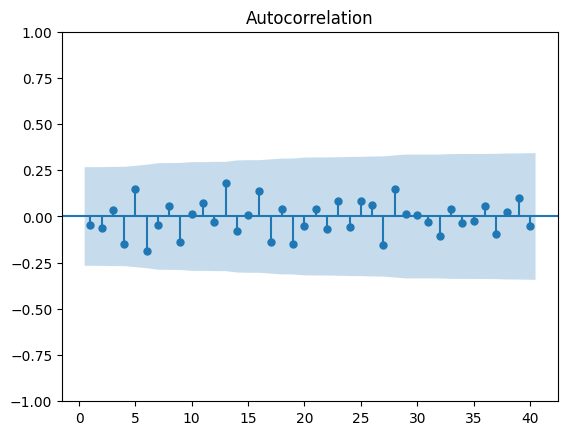

In [373]:
sgt.plot_acf(resid_ar1_ma1_x, zero = False, lags=40)
plt.show()

In [377]:
print(result_ar1_ma1_x.summary())

                               SARIMAX Results                                
Dep. Variable:                Returns   No. Observations:                   54
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -188.020
Date:                Wed, 05 Mar 2025   AIC                            382.040
Time:                        10:51:48   BIC                            388.007
Sample:                    01-12-2020   HQIC                           384.341
                         - 01-17-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6499      0.272      2.386      0.017       0.116       1.184
ma.L1         -0.2458      0.442     -0.556      0.578      -1.112       0.620
sigma2        61.6399      9.478      6.503      0.0

### Seasonality

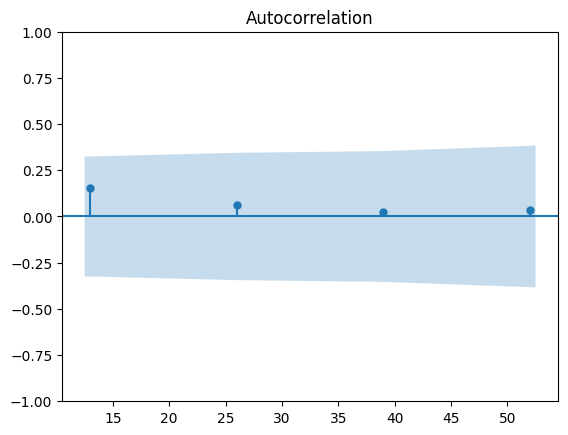

In [386]:
sgt.plot_acf(df.Returns, lags = [13, 26, 39, 52])
plt.show()

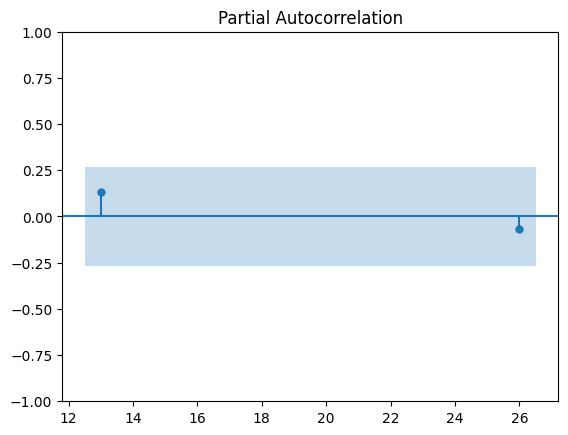

In [388]:
sgt.plot_pacf(df.Returns, lags = [13, 26])
plt.show()

In [390]:
# seasonal_order = 0, 0, 0

In [426]:
model_sarma = SARIMAX(df.Returns, order=(1, 0, 1), seasonal_order=(0, 0, 0, 13))
result_sarma = model_sarma.fit()

In [428]:
resid_sarma = result_sarma.resid

In [430]:
mae = np.mean(np.abs(resid_sarma))
mae

5.885507468827848

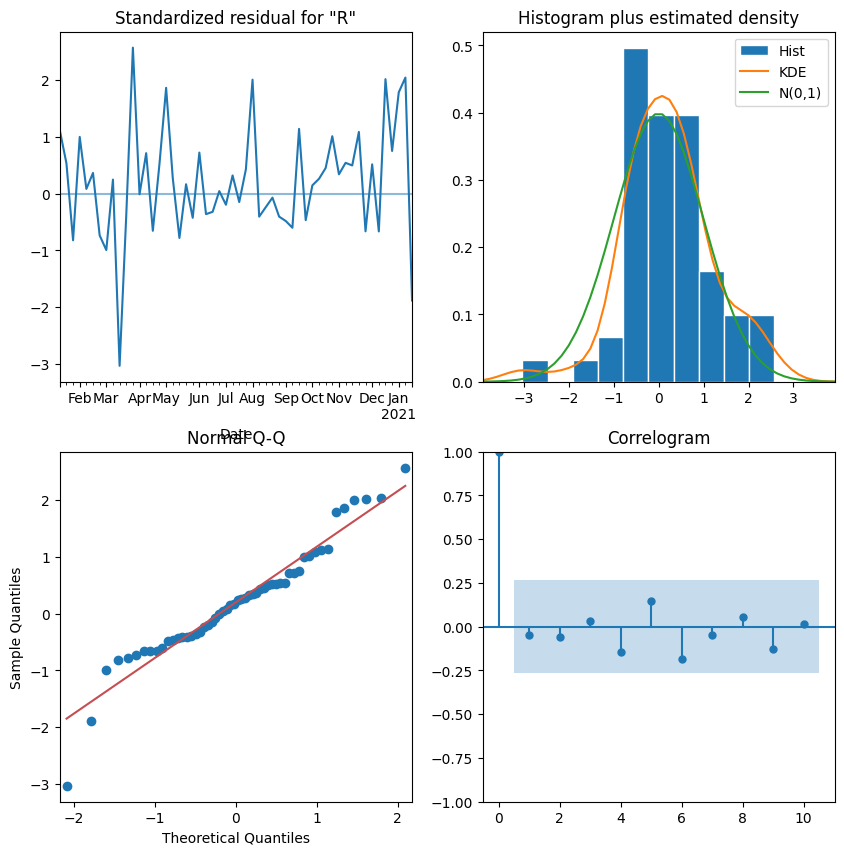

In [432]:
result_sarma.plot_diagnostics(figsize=(10, 10))
plt.show()

In [434]:
print(result_sarma.summary())

                               SARIMAX Results                                
Dep. Variable:                Returns   No. Observations:                   54
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -188.020
Date:                Wed, 05 Mar 2025   AIC                            382.040
Time:                        10:58:57   BIC                            388.007
Sample:                    01-12-2020   HQIC                           384.341
                         - 01-17-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6499      0.272      2.386      0.017       0.116       1.184
ma.L1         -0.2458      0.442     -0.556      0.578      -1.112       0.620
sigma2        61.6399      9.478      6.503      0.0

In [436]:
model_sarmax = SARIMAX(df.Returns, order=(1, 0, 1), seasonal_order=(0, 0, 0, 13),
                      exog=df[['Open', 'High', 'Low']])
result_sarmax = model_sarmax.fit()

In [438]:
resid_sarmax = result_sarmax.resid

In [440]:
mae = np.mean(np.abs(resid_sarmax))
mae

5.556692256117066

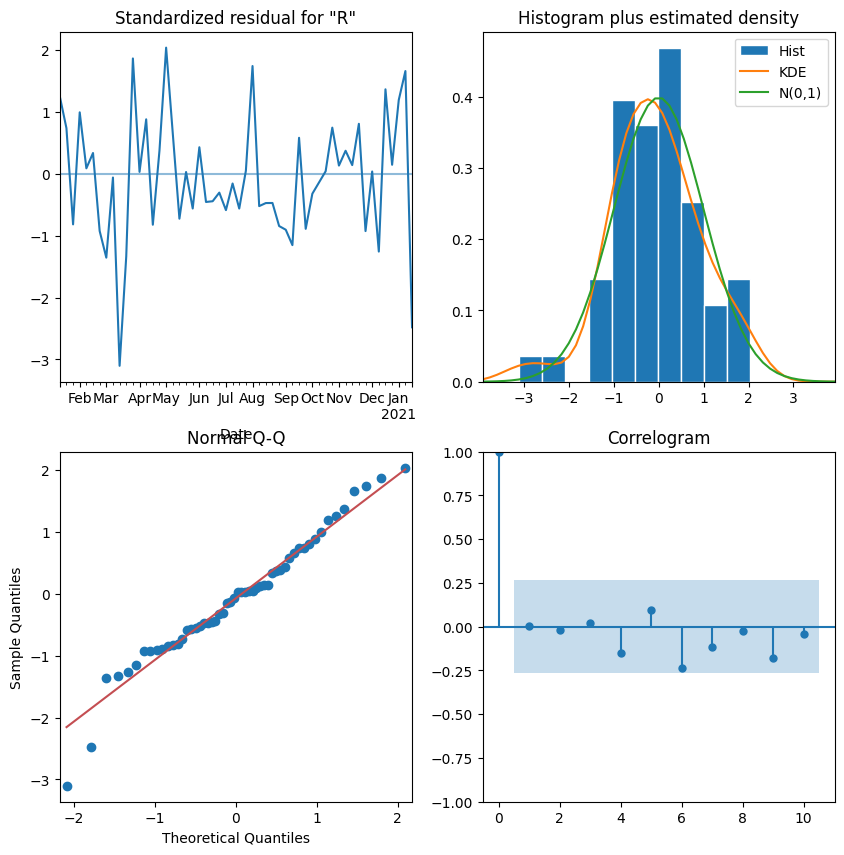

In [442]:
result_sarmax.plot_diagnostics(figsize=(10, 10))
plt.show()

In [444]:
print(result_sarmax.summary())

                               SARIMAX Results                                
Dep. Variable:                Returns   No. Observations:                   54
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -183.541
Date:                Wed, 05 Mar 2025   AIC                            379.083
Time:                        11:05:04   BIC                            391.017
Sample:                    01-12-2020   HQIC                           383.685
                         - 01-17-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Open           2.4181      1.796      1.346      0.178      -1.102       5.938
High          -1.3431      0.997     -1.347      0.178      -3.297       0.611
Low           -1.0745      0.808     -1.330      0.1

### d = ? to check sufficient d value to achieve stationarity

In [514]:
model_arma = SARIMAX(df.Returns, order=(1, 0, 1))
model_arima = SARIMAX(df.Close, order=(1, 1, 1))

In [516]:
print(model_arma.fit().summary())
print('*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=')
print('Above - ARMA(1, 0, 1)')
print('Below - ARIMA(1, 1, 1)')
print('*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=*=')
print(model_arima.fit().summary())

                               SARIMAX Results                                
Dep. Variable:                Returns   No. Observations:                   54
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -188.020
Date:                Wed, 05 Mar 2025   AIC                            382.040
Time:                        11:23:24   BIC                            388.007
Sample:                    01-12-2020   HQIC                           384.341
                         - 01-17-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6499      0.272      2.386      0.017       0.116       1.184
ma.L1         -0.2458      0.442     -0.556      0.578      -1.112       0.620
sigma2        61.6399      9.478      6.503      0.0

===>>> from analyses I found out that d = 1 is enough to make my data stationary

In [518]:
# sgt.plot_acf(df.Close, lags=[13, 26, 39, 52], zero=False)
# plt.show()

#==> ACF & PACF for seasonal orders of integrated model. SARIMAX

In [534]:
model_sarimax = SARIMAX(df.Close, order=(1, 2, 1), seasonal_order=(0, 0, 0, 13), 
                       exog=df[['Open', 'High', 'Low']])
result_sarimax=model_sarimax.fit()

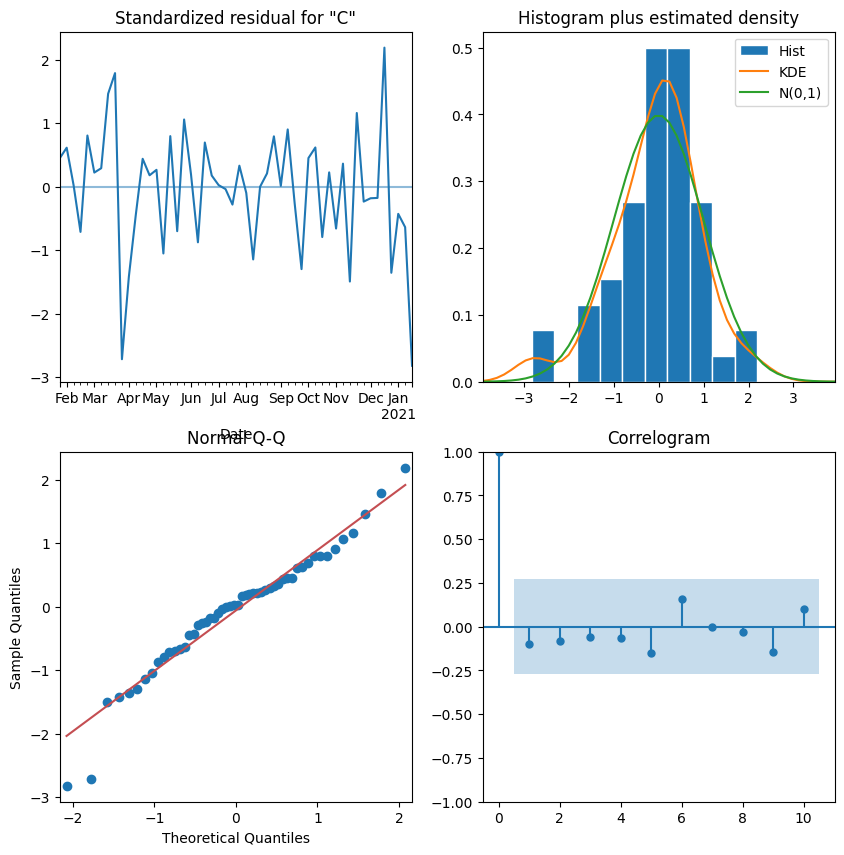

In [536]:
result_sarimax.plot_diagnostics(figsize=(10, 10))
plt.show()

In [538]:
print(result_sarimax.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                   54
Model:               SARIMAX(1, 2, 1)   Log Likelihood                  22.210
Date:                Wed, 05 Mar 2025   AIC                            -32.420
Time:                        11:25:48   BIC                            -20.712
Sample:                    01-12-2020   HQIC                           -27.931
                         - 01-17-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Open           0.9622      0.052     18.477      0.000       0.860       1.064
High           0.0059      0.027      0.220      0.826      -0.047       0.059
Low            0.0320      0.025      1.257      0.2

In [480]:
# print(result_sarmax.summary())

In [525]:
for d in range(3):
    model_sarimax = SARIMAX(df['Close'], order=(1, d, 1), seasonal_order=(0, 0, 0, 13), exog=df[['Open', 'High', 'Low']])
    result_sarimax = model_sarimax.fit()
    print(f'Order (1, {d}, 1): AIC = {result_sarimax.aic}, BIC = {result_sarimax.bic}')

Order (1, 0, 1): AIC = -50.48358006081607, BIC = -38.54967578143042
Order (1, 1, 1): AIC = -47.437572159429884, BIC = -35.61582067811715
Order (1, 2, 1): AIC = -32.41964869558239, BIC = -20.712186384093823


### Auto ARIMA

In [528]:
import pmdarima as pm

In [532]:
results1 = pm.auto_arima(df.Close)
results1

ARIMA(order=(0, 2, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [542]:
results2 = pm.auto_arima(df.Returns)
results2

ARIMA(order=(1, 0, 0), scoring_args={}, suppress_warnings=True)

In [546]:
print(results1.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   54
Model:               SARIMAX(0, 2, 2)   Log Likelihood                -448.111
Date:                Wed, 05 Mar 2025   AIC                            902.223
Time:                        11:27:08   BIC                            908.077
Sample:                    01-12-2020   HQIC                           904.467
                         - 01-17-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4927      0.093     -5.271      0.000      -0.676      -0.309
ma.L2         -0.3131      0.139     -2.254      0.024      -0.585      -0.041
sigma2      1.761e+06    1.9e+05      9.285      0.0

In [548]:
print(results2.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   54
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -186.507
Date:                Wed, 05 Mar 2025   AIC                            379.013
Time:                        11:27:25   BIC                            384.980
Sample:                    01-12-2020   HQIC                           381.315
                         - 01-17-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.1153      1.114      1.899      0.058      -0.068       4.298
ar.L1          0.3720      0.101      3.678      0.000       0.174       0.570
sigma2        58.3800      8.497      6.870      0.0

In [584]:
results3 = pm.auto_arima(
    df.Close, 
    d = 0,    # non-seasonal difference order
    start_p = 1,
    start_q = 1, 
    max_p = 4, 
    max_q = 4
)
results3

ARIMA(order=(2, 0, 0), scoring_args={}, suppress_warnings=True)

In [586]:
print(results3.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   54
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -467.916
Date:                Wed, 05 Mar 2025   AIC                            943.833
Time:                        11:30:16   BIC                            951.789
Sample:                    01-12-2020   HQIC                           946.901
                         - 01-17-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    874.9451    779.240      1.123      0.262    -652.337    2402.227
ar.L1          1.5630      0.116     13.477      0.000       1.336       1.790
ar.L2         -0.6193      0.164     -3.777      0.0

In [590]:
results4 = pm.auto_arima(df.Close,
    d = 0,    # non-seasonal difference order
    start_p = 1,
    start_q = 1, 
    max_p = 4, 
    max_q = 4,
    seasonal = True, 
    m = 13, 
    D = 1, 
    start_P = 1, 
    start_Q = 1,
    max_P = 5, 
    max_Q = 5,
    information_criterion = 'aic', # used to select best model
    trace = True,  # print results whilst training
    error_action = 'ignore',  #ignore orders that don't work
    stepwise = True  # apply intelligent order search
                       )

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,1,1)[13] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,0,0)(0,1,0)[13] intercept   : AIC=836.125, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[13] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,0,1)(0,1,1)[13] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,0,0)(0,1,0)[13]             : AIC=849.544, Time=0.01 sec
 ARIMA(0,0,0)(1,1,0)[13] intercept   : AIC=835.548, Time=0.02 sec
 ARIMA(0,0,0)(2,1,0)[13] intercept   : AIC=837.534, Time=0.05 sec
 ARIMA(0,0,0)(1,1,1)[13] intercept   : AIC=831.932, Time=0.05 sec
 ARIMA(0,0,0)(0,1,1)[13] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,0,0)(2,1,1)[13] intercept   : AIC=833.771, Time=0.10 sec
 ARIMA(0,0,0)(1,1,2)[13] intercept   : AIC=833.452, Time=0.09 sec
 ARIMA(0,0,0)(0,1,2)[13] intercept   : AIC=828.568, Time=0.25 sec
 ARIMA(0,0,0)(0,1,3)[13] intercept   : AIC=830.661, Time=0.45 sec
 ARIMA(0,0,0)(1,1,3)[13] intercept   : AIC=835.403, Time=0.19 sec
 ARIMA(1,0,0)(0,1,2)[13] intercept   : AIC=inf, T

In [646]:
results4

ARIMA(order=(0, 0, 0), scoring_args={}, seasonal_order=(0, 1, 2, 13),
      suppress_warnings=True)

In [594]:
print(results4.summary())

                                   SARIMAX Results                                   
Dep. Variable:                             y   No. Observations:                   54
Model:             SARIMAX(0, 1, [1, 2], 13)   Log Likelihood                -410.284
Date:                       Wed, 05 Mar 2025   AIC                            828.568
Time:                               11:31:21   BIC                            835.422
Sample:                           01-12-2020   HQIC                           831.064
                                - 01-17-2021                                         
Covariance Type:                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3829.5974    635.441      6.027      0.000    2584.156    5075.039
ma.S.L13      -1.4384      0.386     -3.730      0.000      -2.194      -0.

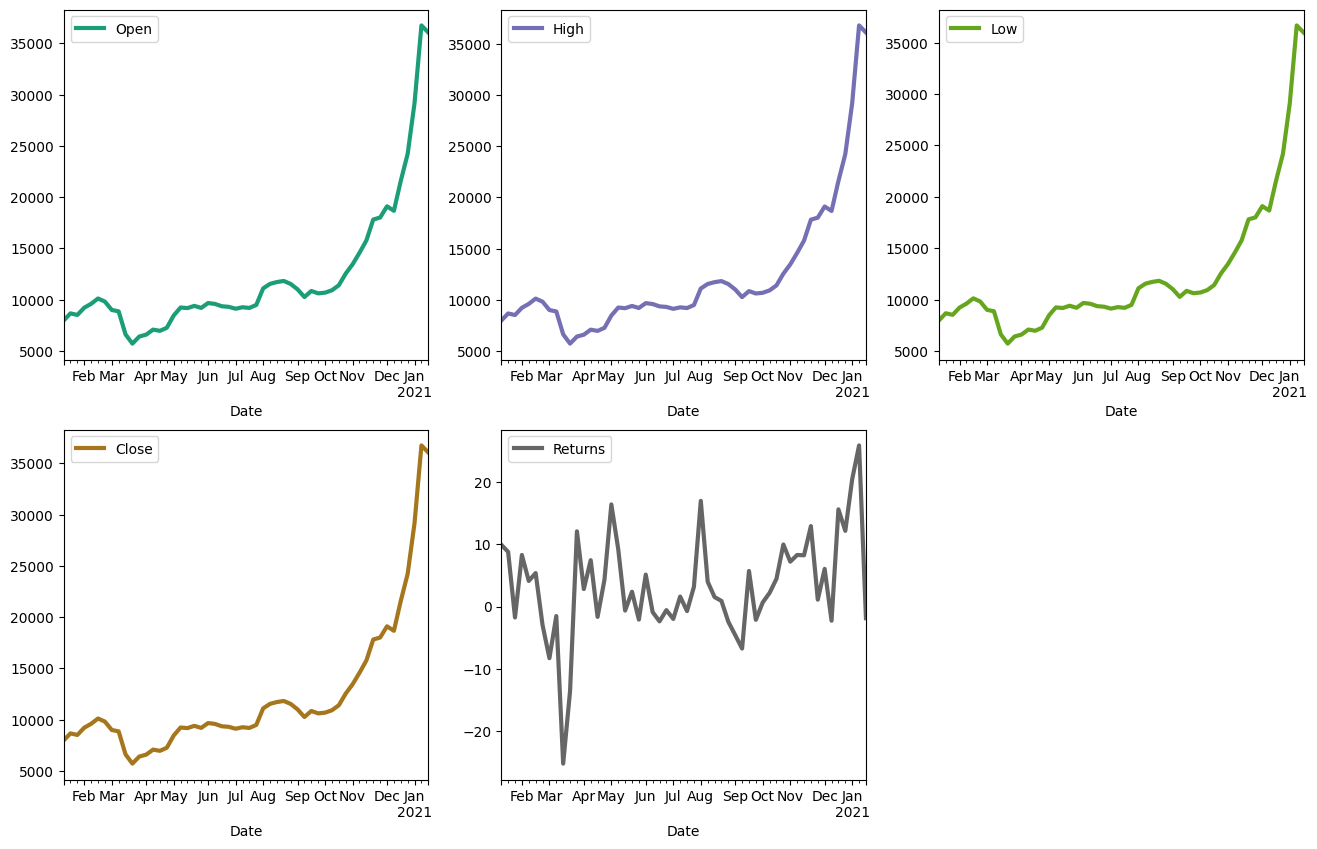

In [608]:
plt.style.use('default')
df.plot(subplots=True,
       colormap = 'Dark2',
       linewidth = 3, 
       layout=(2, 3), 
       figsize = (16,  10),
       sharex = False, 
       sharey = False)
plt.show()

In [626]:
# best_model = None
# best_p = float('inf')  # Initialize with a very high p-value
# for i in range(len(models)):
#     for j in range(i + 1, len(models)):
#         p = LLR_test(models[i], models[j])
#         if p < best_p:
#             best_p = p
#             best_model = models[j] if p < 0.05 else models[i]
#         print(f"Comparing model {i+1} and model {j+1}, p-value = {p}")
# print(f"Best model based on LLR test: Model {models.index(best_model) + 1} with p-value = {best_p}")

In [610]:
from scipy.stats.distributions import chi2
def LLR_test(mod_1, mod_2, DF=1): # DF -> degrees of freedom
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

In [612]:
models = [
    model_ar1_ma1,
    model_ar1_ma1_x,
    model_sarma,
    model_sarmax,
    model_arma,
    model_arima,
    model_sarimax,
    results1,
    results2,
    results3,
    results4
]

In [622]:
LLR_test(model_ar1_ma1, model_ar1_ma1_x)

0.003

In [628]:
LLR_test(model_ar1_ma1_x, model_sarma)

1.0

In [630]:
LLR_test(model_sarma, model_ar1_ma1_x)

0.003

In [632]:
LLR_test(model_sarmax, model_ar1_ma1_x)

1.0

In [634]:
LLR_test(model_ar1_ma1_x, model_sarmax)

1.0

In [638]:
LLR_test(model_sarma, model_sarmax)

0.003

In [640]:
LLR_test(model_sarmax, model_sarimax)

0.0

In [642]:
LLR_test(model_ar1_ma1_x, model_sarimax)

0.0

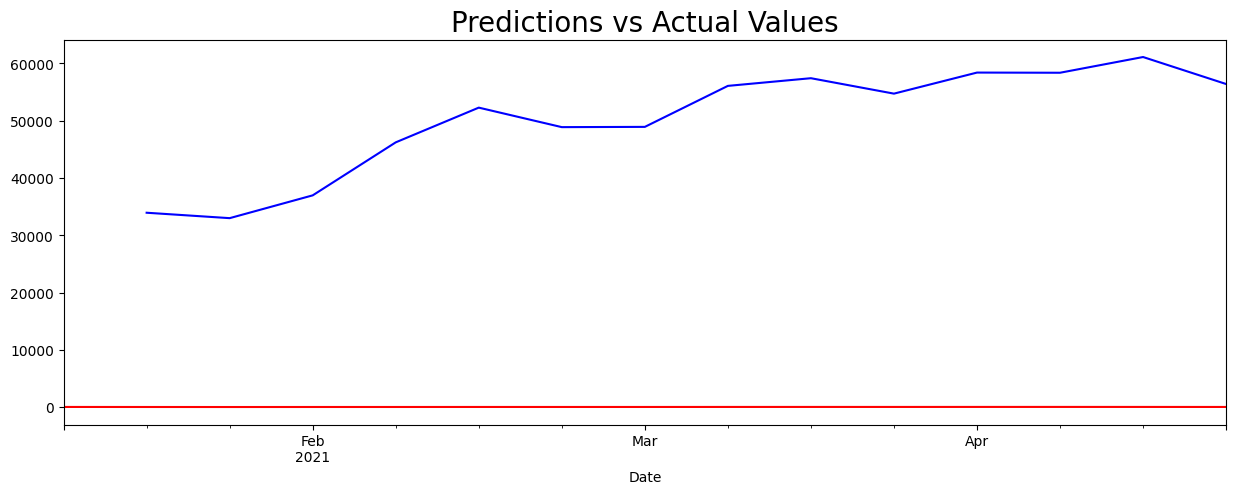

In [658]:
df_pred_armax = model_ar1_ma1_x.fit().predict(start = start_date, end = end_date, 
        exog=df_test[['Open', 'High', 'Low']][start_date:end_date])
df_pred_armax[start_date:end_date].plot(figsize=(15, 5), color = 'red')
df_test.Close[start_date:end_date].plot(color='blue')
plt.title('Predictions vs Actual Values', size = 20)
plt.show()

In [678]:
df_test_norm = (df_test.Close[start_date:end_date] - df_test.Close[start_date:end_date].min()) / (df_test.Close[start_date:end_date].max() - df_test.Close[start_date:end_date].min())
df_pred_norm = (df_pred_armax - df_pred_armax.min()) / (df_pred_armax.max() - df_pred_armax.min())

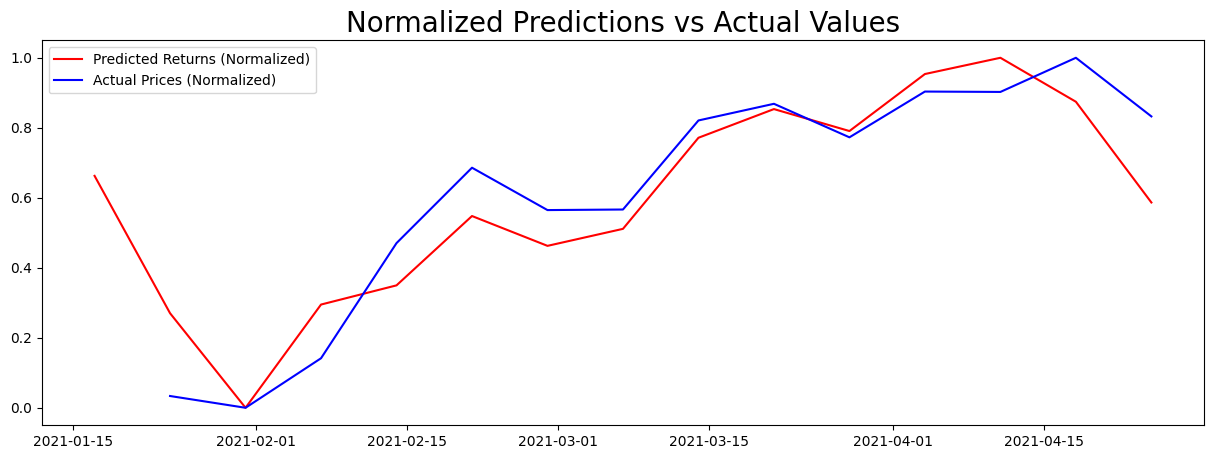

In [680]:
plt.figure(figsize=(15, 5))
plt.plot(df_pred_norm, color='red', label='Predicted Returns (Normalized)')
plt.plot(df_test_norm, color='blue', label='Actual Prices (Normalized)')
plt.title('Normalized Predictions vs Actual Values', size=20)
plt.legend()
plt.show()

===>>> Below, I created returns for test df too, so that results will be same

In [673]:
df_test['Returns'] = df_test.Close.pct_change(1).mul(100)

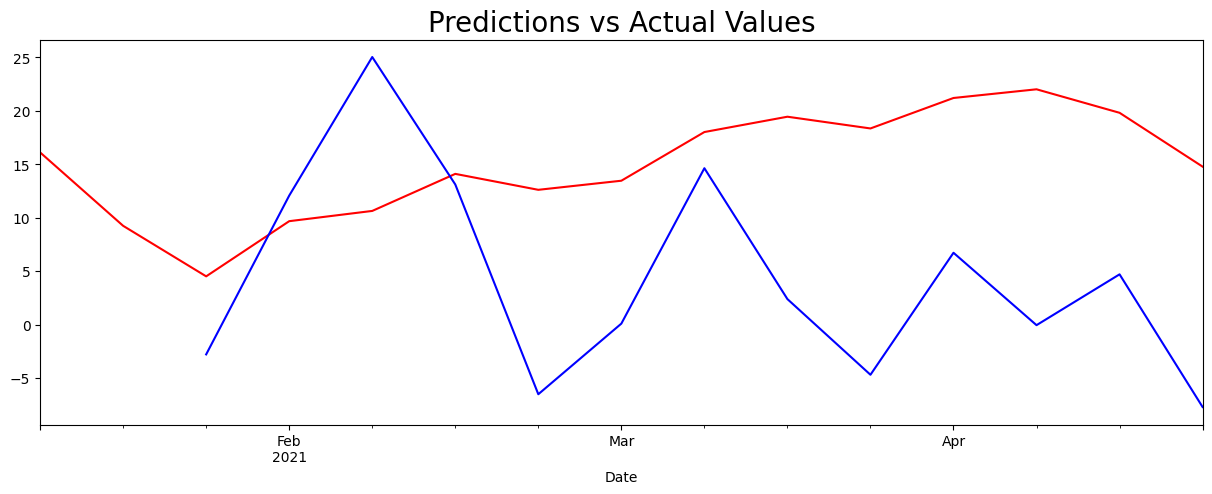

In [676]:
df_pred_armax = model_ar1_ma1_x.fit().predict(start = start_date, end = end_date, 
        exog=df_test[['Open', 'High', 'Low']][start_date:end_date])
df_pred_armax[start_date:end_date].plot(figsize=(15, 5), color = 'red')
df_test.Returns[start_date:end_date].plot(color='blue')
plt.title('Predictions vs Actual Values', size = 20)
plt.show()

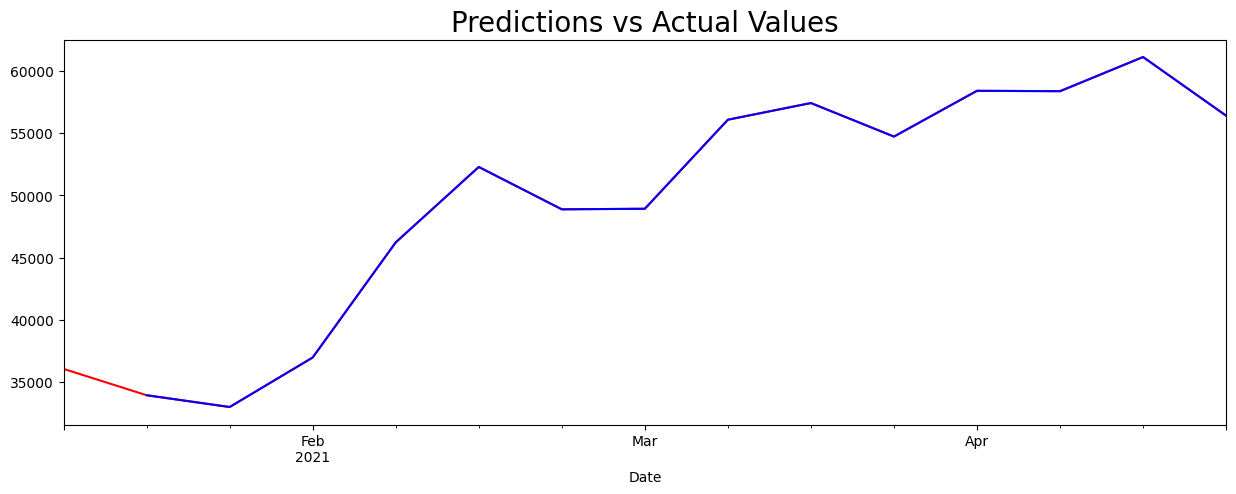

In [688]:
df_pred_sarimax = model_sarimax.fit().predict(start = start_date, end = end_date, 
        exog=df_test[['Open', 'High', 'Low']][start_date:end_date])
df_pred_sarimax[start_date:end_date].plot(figsize=(15, 5), color = 'red')
df_test.Close[start_date:end_date].plot(color='blue')
plt.title('Predictions vs Actual Values', size = 20)
plt.show()

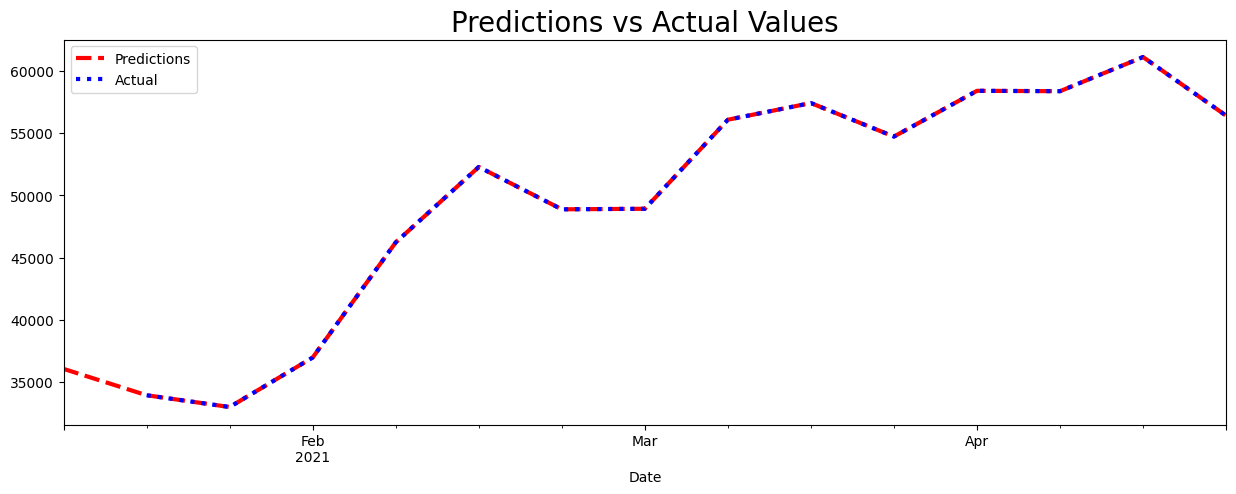

In [723]:
df_pred_sarimax[start_date:end_date].plot(figsize=(15, 5), 
                color='red', linestyle='dashed', linewidth=3, label='Predictions')
df_test.Close[start_date:end_date].plot(color='blue', linewidth=3, 
                label='Actual', linestyle=':')
plt.title('Predictions vs Actual Values', size=20)
plt.legend()
plt.show()

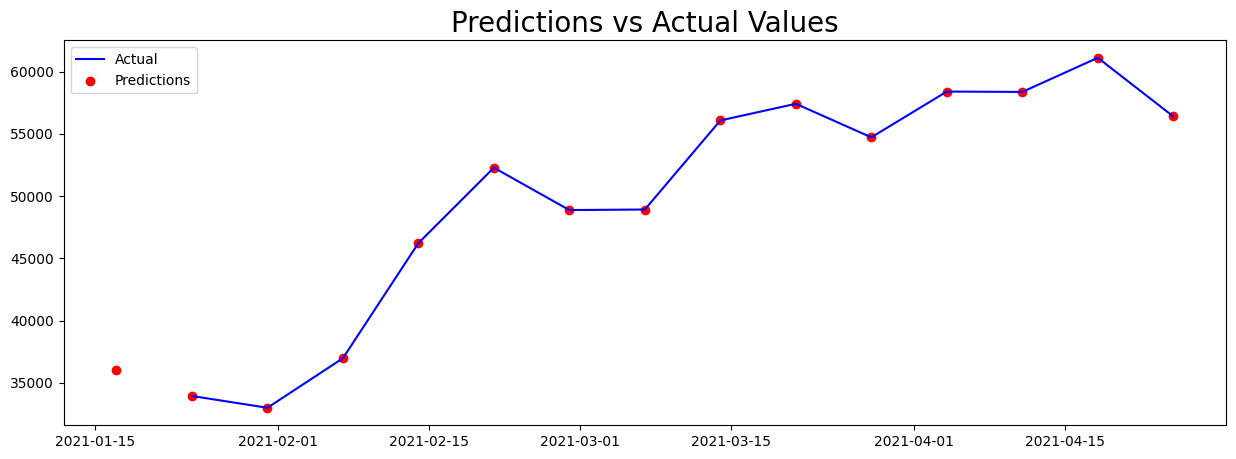

In [725]:
plt.figure(figsize=(15, 5))
plt.plot(df_test.Close[start_date:end_date], color='blue', label='Actual')
plt.scatter(df_pred_sarimax[start_date:end_date].index,
            df_pred_sarimax[start_date:end_date], color='red', label='Predictions')
plt.title('Predictions vs Actual Values', size=20)
plt.legend()
plt.show()

Solid Line: '-' \
Dashed Line: '--' \
Dotted Line: ':' \
Dash-Dot Line: '-.'

Wow, my predictions are 100% correct!\
SARIMAX is the most appropriate model for this dataset.